## Mental Fitness Prediction

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Dataset Link - https://www.kaggle.com/datasets/ydalat/lifestyle-and-wellbeing-data

### Loading data

In [2]:
df = pd.read_csv('Dataset/Wellbeing_and_lifestyle_data_Kaggle.csv')
df.head()

,Timestamp,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,...,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
0,7/7/15,3,2,2,5,0,5,2,0,1,...,7,5,5,1,4,0,5,36 to 50,Female,609.5
1,7/7/15,2,3,4,3,8,10,5,2,2,...,8,2,2,2,3,2,6,36 to 50,Female,655.6
2,7/7/15,2,3,3,4,4,10,3,2,2,...,8,10,2,2,4,8,3,36 to 50,Female,631.6
3,7/7/15,3,3,10,3,10,7,2,5,2,...,5,7,5,1,5,2,0,51 or more,Female,622.7
4,7/7/15,5,1,3,3,10,4,2,4,2,...,7,0,0,2,8,1,5,51 or more,Female,663.9


### Data Preprocesing

In [3]:
df.shape

(15972, 24)

In [4]:
df.columns

Index(['Timestamp', 'FRUITS_VEGGIES', 'DAILY_STRESS', 'PLACES_VISITED',
       'CORE_CIRCLE', 'SUPPORTING_OTHERS', 'SOCIAL_NETWORK', 'ACHIEVEMENT',
       'DONATION', 'BMI_RANGE', 'TODO_COMPLETED', 'FLOW', 'DAILY_STEPS',
       'LIVE_VISION', 'SLEEP_HOURS', 'LOST_VACATION', 'DAILY_SHOUTING',
       'SUFFICIENT_INCOME', 'PERSONAL_AWARDS', 'TIME_FOR_PASSION',
       'WEEKLY_MEDITATION', 'AGE', 'GENDER', 'WORK_LIFE_BALANCE_SCORE'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15972 entries, 0 to 15971
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Timestamp                15972 non-null  object 
 1   FRUITS_VEGGIES           15972 non-null  int64  
 2   DAILY_STRESS             15972 non-null  object 
 3   PLACES_VISITED           15972 non-null  int64  
 4   CORE_CIRCLE              15972 non-null  int64  
 5   SUPPORTING_OTHERS        15972 non-null  int64  
 6   SOCIAL_NETWORK           15972 non-null  int64  
 7   ACHIEVEMENT              15972 non-null  int64  
 8   DONATION                 15972 non-null  int64  
 9   BMI_RANGE                15972 non-null  int64  
 10  TODO_COMPLETED           15972 non-null  int64  
 11  FLOW                     15972 non-null  int64  
 12  DAILY_STEPS              15972 non-null  int64  
 13  LIVE_VISION              15972 non-null  int64  
 14  SLEEP_HOURS           

In [6]:
df.describe()

,FRUITS_VEGGIES,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,TODO_COMPLETED,FLOW,DAILY_STEPS,LIVE_VISION,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,WORK_LIFE_BALANCE_SCORE
count,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000
mean,2.922677,5.232970,5.508077,5.616454,6.474267,4.000751,2.715314,1.410656,5.745993,3.194778,5.703606,3.752129,7.042888,2.898886,2.930879,1.728963,5.711558,3.326572,6.233346,666.751503
std,1.442694,3.311912,2.840334,3.242021,3.086672,2.755837,1.851586,0.491968,2.624097,2.357518,2.891013,3.230987,1.199044,3.692180,2.676301,0.444509,3.089630,2.729293,3.016571,45.019868
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,480.000000
25%,2.000000,2.000000,3.000000,3.000000,4.000000,2.000000,1.000000,1.000000,4.000000,1.000000,3.000000,1.000000,6.000000,0.000000,1.000000,1.000000,3.000000,1.000000,4.000000,636.000000
50%,3.000000,5.000000,5.000000,5.000000,6.000000,3.000000,3.000000,1.000000,6.000000,3.000000,5.000000,3.000000,7.000000,0.000000,2.000000,2.000000,5.000000,3.000000,7.000000,667.700000
75%,4.000000,8.000000,8.000000,10.000000,10.000000,6.000000,5.000000,2.000000,8.000000,5.000000,8.000000,5.000000,8.000000,5.000000,4.000000,2.000000,9.000000,5.000000,10.000000,698.500000
max,5.000000,10.000000,10.000000,10.000000,10.000000,10.000000,5.000000,2.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2.000000,10.000000,10.000000,10.000000,820.200000


In [7]:
df.drop(['Timestamp'], axis=1, inplace=True)

In [8]:
df.isnull().sum()

FRUITS_VEGGIES             0
DAILY_STRESS               0
PLACES_VISITED             0
CORE_CIRCLE                0
SUPPORTING_OTHERS          0
SOCIAL_NETWORK             0
ACHIEVEMENT                0
DONATION                   0
BMI_RANGE                  0
TODO_COMPLETED             0
FLOW                       0
DAILY_STEPS                0
LIVE_VISION                0
SLEEP_HOURS                0
LOST_VACATION              0
DAILY_SHOUTING             0
SUFFICIENT_INCOME          0
PERSONAL_AWARDS            0
TIME_FOR_PASSION           0
WEEKLY_MEDITATION          0
AGE                        0
GENDER                     0
WORK_LIFE_BALANCE_SCORE    0
dtype: int64

In [9]:
df['AGE'].unique()

array(['36 to 50', '51 or more', '21 to 35', 'Less than 20'], dtype=object)

In [10]:
import random

# Function to randomize age values within each class
def randomize_age_within_class(age_class):
    if age_class == 'Less than 20':
        return random.randint(16, 19)  # Random age between 16 and 19
    elif age_class == '21 to 35':
        return random.randint(21, 35)  # Random age between 21 and 35
    elif age_class == '36 to 50':
        return random.randint(36, 50)  # Random age between 36 and 50
    elif age_class == '51 or more':
        return random.randint(51, 75)  # Random age between 51 and 75 (you can adjust the upper limit as needed)

# Apply randomization to the 'AGE' column
df['AGE'] = df['AGE'].apply(randomize_age_within_class)

In [11]:
df['AGE']

0        40
1        49
2        42
3        53
4        54
         ..
15967    56
15968    29
15969    30
15970    33
15971    33
Name: AGE, Length: 15972, dtype: int64

In [12]:
df['GENDER'].unique()

array(['Female', 'Male'], dtype=object)

In [13]:
df['GENDER'] =  df['GENDER'].map({'Male': 1, 'Female': 0})

In [14]:
df['GENDER'].unique()

array([0, 1], dtype=int64)

In [15]:
df['DAILY_STRESS'].dtype

dtype('O')

In [16]:
df['DAILY_STRESS'] = pd.to_numeric(df['DAILY_STRESS'], errors='coerce').astype('Int64')

In [17]:
df_copy = df.copy()

In [18]:
df.drop(["CORE_CIRCLE","FLOW","LOST_VACATION","PERSONAL_AWARDS","LIVE_VISION"], axis=1, inplace=True)

In [66]:
df.dropna(inplace=True)

In [76]:
df.shape

(15971, 18)

### Feature Selection

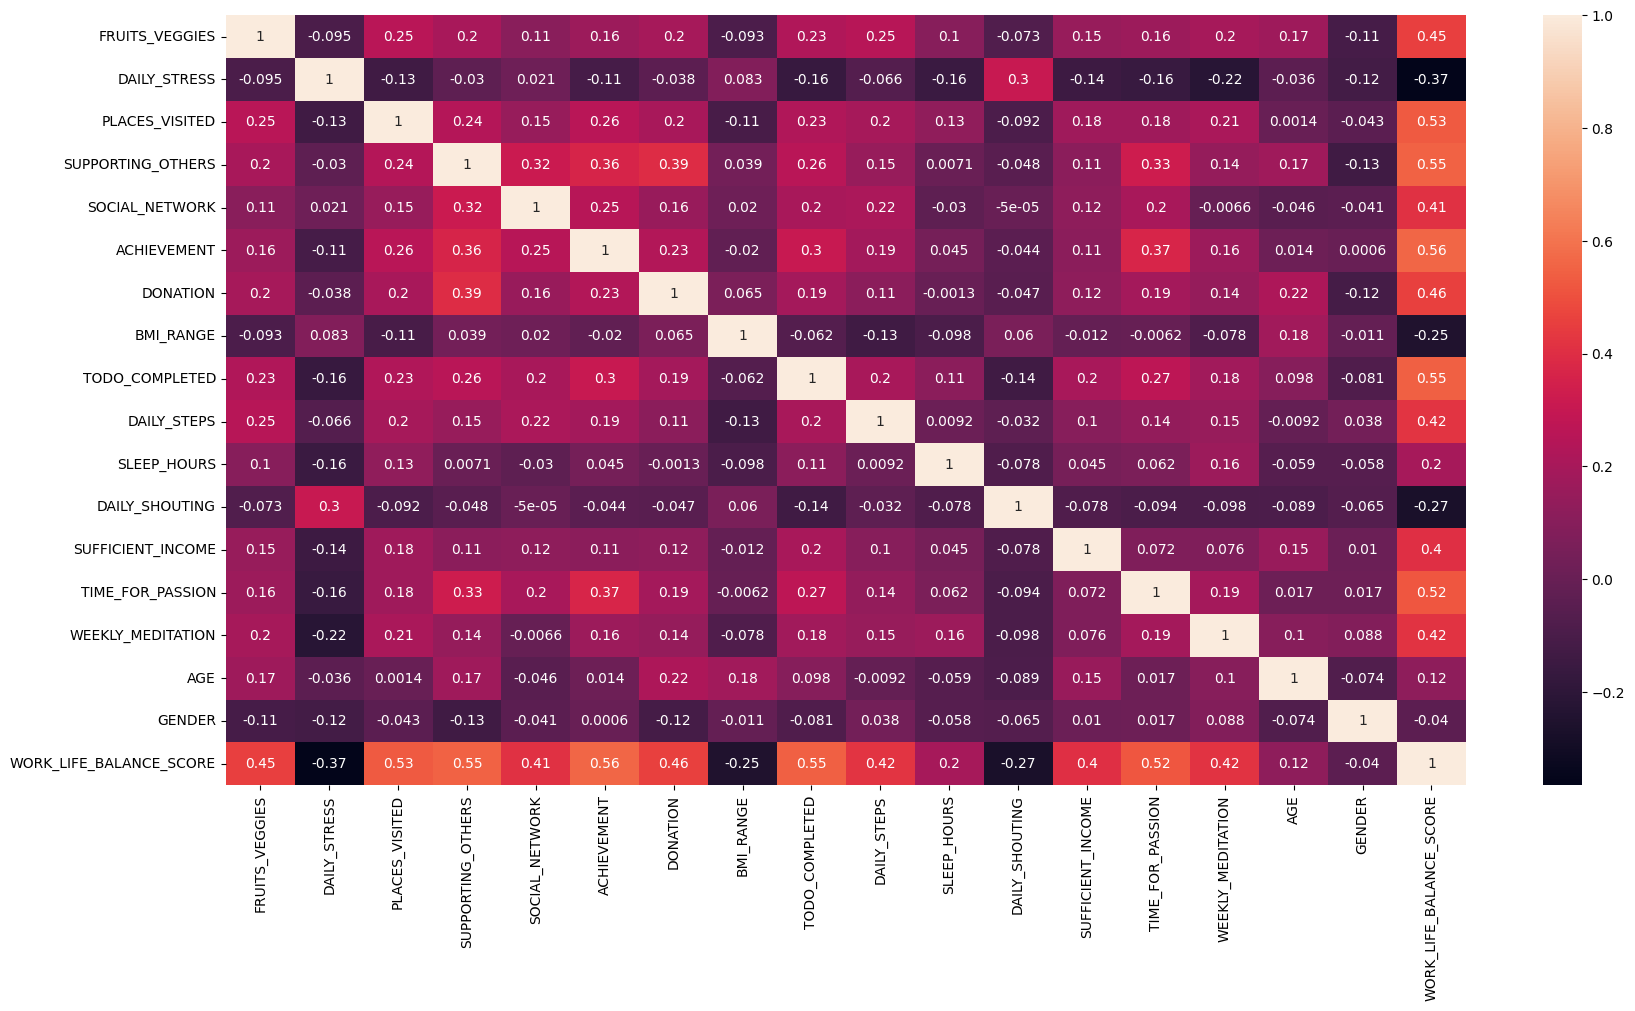

In [20]:
plt.figure(figsize=(20,10))
sns.heatmap(data=df.corr(), annot=True)
plt.show()

In [21]:
X = df.drop(['WORK_LIFE_BALANCE_SCORE'], axis=1)
y = df['WORK_LIFE_BALANCE_SCORE']

In [22]:
X.isna().sum()

FRUITS_VEGGIES       0
DAILY_STRESS         0
PLACES_VISITED       0
SUPPORTING_OTHERS    0
SOCIAL_NETWORK       0
ACHIEVEMENT          0
DONATION             0
BMI_RANGE            0
TODO_COMPLETED       0
DAILY_STEPS          0
SLEEP_HOURS          0
DAILY_SHOUTING       0
SUFFICIENT_INCOME    0
TIME_FOR_PASSION     0
WEEKLY_MEDITATION    0
AGE                  0
GENDER               0
dtype: int64

In [23]:
from sklearn.feature_selection import SelectKBest

In [24]:
best_feature = SelectKBest(k=10)
bf = best_feature.fit(X,y)

In [25]:
col = pd.DataFrame(X.columns)
scr = pd.DataFrame(bf.scores_)

feature_scores = pd.concat([col, scr],axis=1)
# df_final = df_final.columns
feature_scores.columns=['Features', 'Scores']
feature_scores

,Features,Scores
0,FRUITS_VEGGIES,3.571959
1,DAILY_STRESS,2.571010
2,PLACES_VISITED,4.688888
3,SUPPORTING_OTHERS,5.435553
4,SOCIAL_NETWORK,3.025574
5,ACHIEVEMENT,5.518858
6,DONATION,3.692555
7,BMI_RANGE,1.733004
8,TODO_COMPLETED,5.164966
9,DAILY_STEPS,65.728808


<Axes: xlabel='Scores', ylabel='Features'>

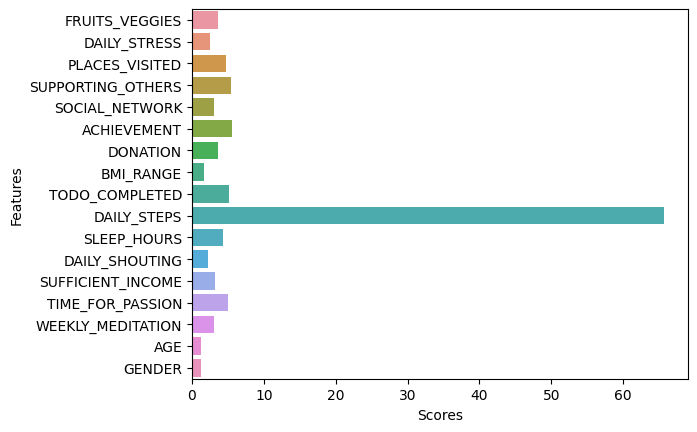

In [26]:
sns.barplot(x=feature_scores['Scores'], y=feature_scores['Features'])

### Splitting Data

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [29]:
X_train.shape, X_test.shape

((12776, 17), (3195, 17))

### Feature Scaling

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
sc = StandardScaler()

In [32]:
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [33]:
X_train_sc

array([[ 0.05299775,  0.88108953,  0.53290169, ..., -0.07236608,
        -0.54144503,  1.27075483],
       [ 1.44049612, -0.57657313, -0.07008759, ...,  1.25648626,
         0.40481849, -0.78693386],
       [ 0.05299775, -1.30540446,  0.23140705, ...,  0.25984701,
        -1.42462432, -0.78693386],
       ...,
       [ 1.44049612,  0.1522582 , -0.37158223, ..., -0.73679225,
        -0.73069774, -0.78693386],
       [ 0.05299775, -0.57657313,  0.23140705, ..., -0.40457916,
         0.46790272,  1.27075483],
       [ 1.44049612, -0.57657313, -0.97457152, ...,  0.25984701,
        -0.6676135 , -0.78693386]])

In [34]:
import pickle
with open('scaler_MFI_2.pkl', 'wb') as f:
    pickle.dump(sc, f)

### Model Building

In [35]:
from sklearn.linear_model import LinearRegression,Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [36]:
model_params = {
    'Linear Regression': {
        'model': LinearRegression(),
        'params': {}
    },
    'Ridge Regression': {
        'model': Ridge(),
        'params': {'alpha': [0.1, 1.0, 10.0]}
    },
    'Lasso Regression': {
        'model': Lasso(),
        'params': {'alpha': [0.1, 1.0, 10.0]}
    },
    'Elastic Net Regression': {
        'model': ElasticNet(),
        'params': {'alpha': [0.1, 1.0, 10.0], 'l1_ratio': [0.2, 0.5, 0.8]}
    },
    'Polynomial Regression': {
        'model': LinearRegression(),
        'params': {}
    },
    'Decision Tree Regression': {
        'model': DecisionTreeRegressor(),
        'params': {'max_depth': [None, 5, 10]}
    },
    'Random Forest Regression': {
        'model': RandomForestRegressor(),
        'params': {'n_estimators': [100, 200], 'max_depth': [None, 5, 10]}
    },
    'Gradient Boosting Regression': {
        'model': GradientBoostingRegressor(),
        'params': {'n_estimators': [100, 200], 'learning_rate': [0.1, 0.01]}
    }
}


### HyperParameter Tuning

In [37]:
from sklearn.model_selection import GridSearchCV

In [38]:
scores = []
for model_name, mp in model_params.items():
    gscv = GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    gscv.fit(X_train_sc, y_train)
    scores.append({
        'model': model_name,
        'score': gscv.best_score_,
        'best_params': gscv.best_params_
    })


In [39]:
df_scores = pd.DataFrame(scores, columns=['model','score','best_params'])
df_scores

,model,score,best_params
0,Linear Regression,0.939536,{}
1,Ridge Regression,0.939536,{'alpha': 10.0}
2,Lasso Regression,0.939500,{'alpha': 0.1}
3,Elastic Net Regression,0.939415,"{'alpha': 0.1, 'l1_ratio': 0.8}"
4,Polynomial Regression,0.939536,{}
5,Decision Tree Regression,0.726819,{'max_depth': 10}
6,Random Forest Regression,0.903319,"{'max_depth': None, 'n_estimators': 200}"
7,Gradient Boosting Regression,0.931007,"{'learning_rate': 0.1, 'n_estimators': 200}"


In [54]:
model_LR = LinearRegression()
model_LR.fit(X_train_sc, y_train)

LinearRegression()

### Model Evaluation

In [59]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [55]:
y_pred_lr = model_LR.predict(X_test_sc)
accuracy_lr = r2_score(y_test, y_pred_lr)
print("Linear Reg:", accuracy_lr)

Linear Reg: 0.9358293030389508


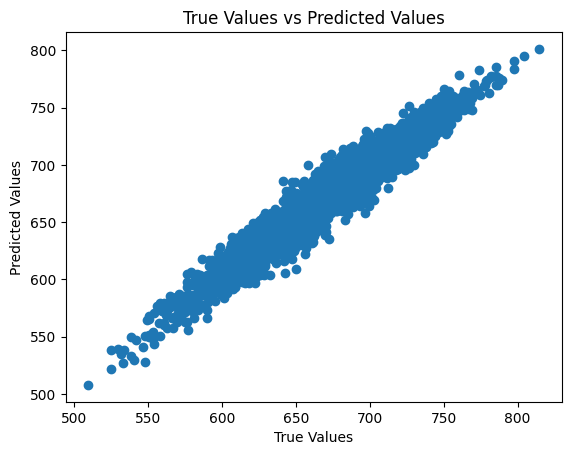

In [148]:
plt.scatter(y_test, y_pred_lr)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True Values vs Predicted Values")
plt.show()

In [60]:
# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred_lr)

# Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred_lr, squared=False)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred_lr)

# R-squared (R2) Score
r2 = r2_score(y_test, y_pred_lr)

# Print the metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2) Score: {r2}")

Mean Squared Error (MSE): 123.6184856409391
Root Mean Squared Error (RMSE): 11.118385028453508
Mean Absolute Error (MAE): 8.785746961769377
R-squared (R2) Score: 0.9358293030389508


### Model Saving

In [142]:
# import pickle
# with open("model_LR.pkl", 'wb') as f:
#     pickle.dump(model_LR, f)

### Mode Testing

In [78]:
ip = [3, 2, 2, 0, 5, 2, 0, 1, 6, 5, 7, 5, 1, 0, 5, 40, 0]
print(ip)

[3, 2, 2, 0, 5, 2, 0, 1, 6, 5, 7, 5, 1, 0, 5, 40, 0]


In [79]:
ip_arr = np.array([ip])
ip_arr

array([[ 3,  2,  2,  0,  5,  2,  0,  1,  6,  5,  7,  5,  1,  0,  5, 40,
         0]])

In [80]:
ip_sc = sc.transform(ip_arr)
ip_sc

C:\Users\Arsath khan\dlcv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[ 0.05299775, -0.57657313, -0.97457152, -1.72661634, -0.47242535,
        -0.7224463 , -1.45921586, -0.83467356,  0.09529832, -0.23924713,
        -0.03186177,  0.77843437, -1.63957974, -1.21659629, -0.40457916,
         0.08939731, -0.78693386]])

In [83]:
y.iloc[0]

609.5

### Prediction

In [149]:
op_lr = model_LR.predict(ip_sc)
op_lr[0]

608.8329289180731

In [150]:
def classify_mental_fitness(score):
    mean_score = 666.751503
    std_dev = 45.019868

    if score < (mean_score - std_dev):  ## score < 621.731635
        return 'Low'
    elif (mean_score - std_dev) <= score <= (mean_score + std_dev):   # 621.731635 <= score <= 711.7713709999999
        return 'Moderate'
    else:
        return 'High'

def get_category_details(category):
    if category == 'Low':
        return "Your predicted mental fitness rate is low. It's important to prioritize your mental well-being and seek professional help. Consider consulting with a mental health professional or therapist for guidance and support. Focus on self-care activities, engage in hobbies that bring you joy, and maintain a strong support network."
    elif category == 'Moderate':
        return "Your predicted mental fitness rate is moderate. Continue to pay attention to your mental well-being and consider engaging in activities that promote positive mental health. Explore mindfulness exercises, practice self-reflection, and seek support from loved ones or support groups. Consider consulting with a mental health professional if needed."
    else:
        return "Congratulations! Your predicted mental fitness rate is high. This indicates a positive mental well-being. Continue to prioritize your mental health by engaging in activities that promote well-being, maintaining healthy habits, and nurturing strong relationships. Remember to practice self-care and be mindful of any changes that may occur."

# Example usage
# mental_fitness_rate = op
category = classify_mental_fitness(op)
details = get_category_details(category)

print(f"Mental Fitness Category: {category}")
print(f"Category Details: {details}")


Mental Fitness Category: Low
Category Details: Your predicted mental fitness rate is low. It's important to prioritize your mental well-being and seek professional help. Consider consulting with a mental health professional or therapist for guidance and support. Focus on self-care activities, engage in hobbies that bring you joy, and maintain a strong support network.


### Recommendations

In [151]:
def recommendation(score):
    
    ## acitivity data
    activity_data = {
        'low': {
            'Meditation' : ['Guided Meditation', 'Breathing Exercises'],
            'Mindfulness Exercises': ['Body Scan', 'Walking Meditation'],
            'Self-Care Routine': ['Take a Bath', 'Read a Book'],
            'Relaxation Exercises': ['Progressive Muscle Relaxation', 'Yoga'],
            'Physical Exercises': ['Light Stretching', 'Short Walks'],
            'Creative Expression': ['Drawing', 'Coloring Book'],
            'Gratitude Journaling': ['Write down three things youre grateful for', 'Reflect on positive experiences'],
            'Social Activities': ['Call or meet a friend', 'Join a club or group'],
        },
        'moderate': {
            'Meditation': ['Mindful Sitting', 'Loving-Kindness Meditation'],
            'Mindfulness Exercises': ['Mindful Eating', 'Nature Observation'],
            'Self-Care Routine': ['Practice Gratitude', 'Listen to Music'],
            'Relaxation Exercises': ['Deep Breathing', 'Visualization'],
            'Physical Exercises': ['Yoga Class', 'Dancing'],
            'Gratitude Journaling': ['Write a gratitude letter to someone', 'Create a gratitude collage'],
            'Creative Expression': ['Writing in a journal', 'Playing a musical instrument'],
            'Social Activities': ['Volunteer for a cause you care about', 'Host a small gathering'],
        },
        'high': {
            'Meditation': ['Vipassana Meditation', 'Transcendental Meditation'],
            'Mindfulness Exercises': ['Mindful Walking', 'Mindful Journaling'],
            'Self-Care Routine': ['Connect with Friends', 'Practice a Hobby'],
            'Relaxation Exercises': ['Tai Chi', 'Qi Gong'],
            'Physical Exercises': ['Hiking in nature', 'Group fitness classes'],
            'Gratitude Journaling': ['Practice daily affirmations', 'Mentor someone'],
            'Creative Expression': ['Painting', 'Photography'],
            'Social Activities': ['Organize a community event', 'Lead a workshop'],
        }
    }
    
    
    ### score into classes
    
    mean_score = 666.751503
    std_dev = 45.019868

    if score < (mean_score - std_dev):  ## score < 621.731635
        fitness_class = 'low'
    elif (mean_score - std_dev) <= score <= (mean_score + std_dev):   # 621.731635 <= score <= 711.7713709999999
        fitness_class = 'moderate'
    else:
        fitness_class = 'high'
        
    ## categorize activites
    
    recommended_activities = []
    user_profile = ['Meditation', 'Mindfulness Exercises', 'Self-Care Routine', 'Relaxation Exercises', 
                'Physical Exercises','Gratitude Journaling', 'Creative Expression', 'Social Activities']
    
    for category, activities in activity_data[fitness_category].items():
        if category in user_profile:
            recommended_activities.extend(activities)
    return recommended_activities
    

In [152]:
activities = recommendation(op_lr[0])
print("Recommendations")
for activity in activities:
    print("- " + activity)

Recommendations
- Guided Meditation
- Breathing Exercises
- Body Scan
- Walking Meditation
- Take a Bath
- Read a Book
- Progressive Muscle Relaxation
- Yoga
- Light Stretching
- Short Walks
- Drawing
- Coloring Book
- Write down three things youre grateful for
- Reflect on positive experiences
- Call or meet a friend
- Join a club or group


### Thank You